Install MistralAI

In [2]:
pip -q install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 7.8 MB/s eta 0:00:00


Configure MistralAI

In [ ]:
from mistralai import Mistral
client = Mistral(api_key="Insert your API key here")

# **PDF to Text**

Set Path for the PDF File

In [17]:
from pathlib import Path

pdf_file = Path("/content/NIPS-2012-imagenet-classification-with-deep-convolutional-neural-networks-Paper.pdf")
assert pdf_file.is_file()


OCR Processing of PDF Using Mistral AI

{
    "pages": [
        {
            "index": 0,
            "markdown": "# ImageNet Classification with Deep Convolutional Neural Networks \n\nAlex Krizhevsky<br>University of Toronto<br>kriz@cs.utoronto.ca<br>Ilya Sutskever<br>University of Toronto<br>ilya@cs.utoronto.ca<br>Geoffrey E. Hinton<br>University of Toronto<br>hinton@cs.utoronto.ca\n\n\n#### Abstract\n\nWe trained a large, deep convolutional neural network to classify the 1.2 million high-resolution images in the ImageNet LSVRC-2010 contest into the 1000 different classes. On the test data, we achieved top-1 and top-5 error rates of $37.5 \\%$ and $17.0 \\%$ which is considerably better than the previous state-of-the-art. The neural network, which has 60 million parameters and 650,000 neurons, consists of five convolutional layers, some of which are followed by max-pooling layers, and three fully-connected layers with a final 1000 -way softmax. To make training faster, we used non-saturating neurons and a very efficient G
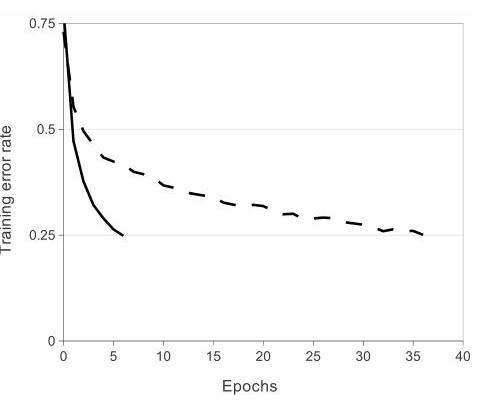
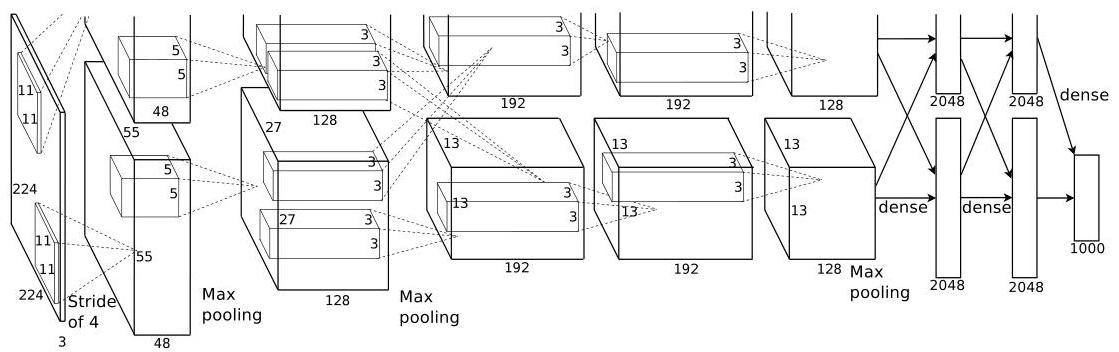
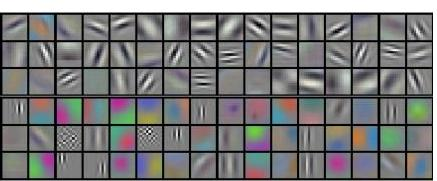
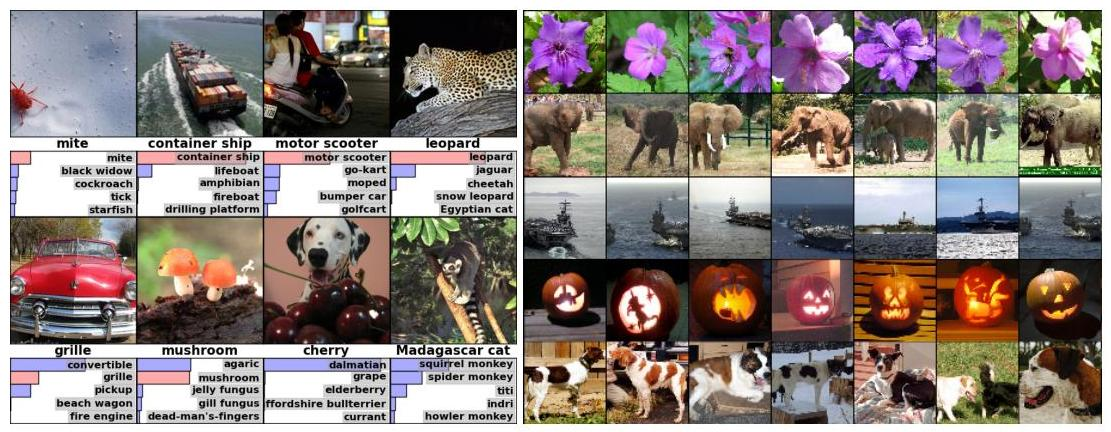

<ipython-input-24-1284883027>:27: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  response_dict = json.loads(pdf_response.json())


In [24]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Upload the PDF file for OCR processing
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,           # File name without extension
        "content": pdf_file.read_bytes(),     # Read file content as bytes
    },
    purpose="ocr",
)

# Generate a signed URL to securely access the uploaded file
signed_url = client.files.get_signed_url(
    file_id=uploaded_file.id,
    expiry=1  # URL valid for 1 minute
)

# Perform OCR using Mistral's latest OCR model
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert OCR response to a formatted JSON string
response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)

# Print the final JSON output
print(json_string)


Rendering OCR Markdown with Inline Base64 Images from Mistral AI OCR Response

# ImageNet Classification with Deep Convolutional Neural Networks 

Alex Krizhevsky<br>University of Toronto<br>kriz@cs.utoronto.ca<br>Ilya Sutskever<br>University of Toronto<br>ilya@cs.utoronto.ca<br>Geoffrey E. Hinton<br>University of Toronto<br>hinton@cs.utoronto.ca


#### Abstract

We trained a large, deep convolutional neural network to classify the 1.2 million high-resolution images in the ImageNet LSVRC-2010 contest into the 1000 different classes. On the test data, we achieved top-1 and top-5 error rates of $37.5 \%$ and $17.0 \%$ which is considerably better than the previous state-of-the-art. The neural network, which has 60 million parameters and 650,000 neurons, consists of five convolutional layers, some of which are followed by max-pooling layers, and three fully-connected layers with a final 1000 -way softmax. To make training faster, we used non-saturating neurons and a very efficient GPU implementation of the convolution operation. To reduce overfitting in the fully-connected layers we employed a recently-developed regularization method called "dropout" that proved to be very effective. We also entered a variant of this model in the ILSVRC-2012 competition and achieved a winning top-5 test error rate of $15.3 \%$, compared to $26.2 \%$ achieved by the second-best entry.


## 1 Introduction

Current approaches to object recognition make essential use of machine learning methods. To improve their performance, we can collect larger datasets, learn more powerful models, and use better techniques for preventing overfitting. Until recently, datasets of labeled images were relatively small - on the order of tens of thousands of images (e.g., NORB [16], Caltech-101/256 [8, 9], and CIFAR-10/100 [12]). Simple recognition tasks can be solved quite well with datasets of this size, especially if they are augmented with label-preserving transformations. For example, the currentbest error rate on the MNIST digit-recognition task ( $<0.3 \%$ ) approaches human performance [4]. But objects in realistic settings exhibit considerable variability, so to learn to recognize them it is necessary to use much larger training sets. And indeed, the shortcomings of small image datasets have been widely recognized (e.g., Pinto et al. [21]), but it has only recently become possible to collect labeled datasets with millions of images. The new larger datasets include LabelMe [23], which consists of hundreds of thousands of fully-segmented images, and ImageNet [6], which consists of over 15 million labeled high-resolution images in over 22,000 categories.

To learn about thousands of objects from millions of images, we need a model with a large learning capacity. However, the immense complexity of the object recognition task means that this problem cannot be specified even by a dataset as large as ImageNet, so our model should also have lots of prior knowledge to compensate for all the data we don't have. Convolutional neural networks (CNNs) constitute one such class of models [16, 11, 13, 18, 15, 22, 26]. Their capacity can be controlled by varying their depth and breadth, and they also make strong and mostly correct assumptions about the nature of images (namely, stationarity of statistics and locality of pixel dependencies). Thus, compared to standard feedforward neural networks with similarly-sized layers, CNNs have much fewer connections and parameters and so they are easier to train, while their theoretically-best performance is likely to be only slightly worse.

Despite the attractive qualities of CNNs, and despite the relative efficiency of their local architecture, they have still been prohibitively expensive to apply in large scale to high-resolution images. Luckily, current GPUs, paired with a highly-optimized implementation of 2D convolution, are powerful enough to facilitate the training of interestingly-large CNNs, and recent datasets such as ImageNet contain enough labeled examples to train such models without severe overfitting.

The specific contributions of this paper are as follows: we trained one of the largest convolutional neural networks to date on the subsets of ImageNet used in the ILSVRC-2010 and ILSVRC-2012 competitions [2] and achieved by far the best results ever reported on these datasets. We wrote a highly-optimized GPU implementation of 2D convolution and all the other operations inherent in training convolutional neural networks, which we make available publicly. Our network contains a number of new and unusual features which improve its performance and reduce its training time, which are detailed in Section 3. The size of our network made overfitting a significant problem, even with 1.2 million labeled training examples, so we used several effective techniques for preventing overfitting, which are described in Section 4. Our final network contains five convolutional and three fully-connected layers, and this depth seems to be important: we found that removing any convolutional layer (each of which contains no more than 1% of the model's parameters) resulted in inferior performance.

In the end, the network's size is limited mainly by the amount of memory available on current GPUs and by the amount of training time that we are willing to tolerate. Our network takes between five and six days to train on two GTX 580 3GB GPUs. All of our experiments suggest that our results can be improved simply by waiting for faster GPUs and bigger datasets to become available.

# 2 The Dataset 

ImageNet is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories. The images were collected from the web and labeled by human labelers using Amazon's Mechanical Turk crowd-sourcing tool. Starting in 2010, as part of the Pascal Visual Object Challenge, an annual competition called the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) has been held. ILSVRC uses a subset of ImageNet with roughly 1000 images in each of 1000 categories. In all, there are roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images.

ILSVRC-2010 is the only version of ILSVRC for which the test set labels are available, so this is the version on which we performed most of our experiments. Since we also entered our model in the ILSVRC-2012 competition, in Section 6 we report our results on this version of the dataset as well, for which test set labels are unavailable. On ImageNet, it is customary to report two error rates: top-1 and top-5, where the top-5 error rate is the fraction of test images for which the correct label is not among the five labels considered most probable by the model.

ImageNet consists of variable-resolution images, while our system requires a constant input dimensionality. Therefore, we down-sampled the images to a fixed resolution of $256 \times 256$. Given a rectangular image, we first rescaled the image such that the shorter side was of length 256, and then cropped out the central $256 \times 256$ patch from the resulting image. We did not pre-process the images in any other way, except for subtracting the mean activity over the training set from each pixel. So we trained our network on the (centered) raw RGB values of the pixels.

## 3 The Architecture

The architecture of our network is summarized in Figure 2. It contains eight learned layers five convolutional and three fully-connected. Below, we describe some of the novel or unusual features of our network's architecture. Sections 3.1-3.4 are sorted according to our estimation of their importance, with the most important first.

[^0]
[^0]:    ${ }^{1}$ http://code.google.com/p/cuda-convnet/

# 3.1 ReLU Nonlinearity 

The standard way to model a neuron's output $f$ as a function of its input $x$ is with $f(x)=\tanh (x)$ or $f(x)=\left(1+e^{-x}\right)^{-1}$. In terms of training time with gradient descent, these saturating nonlinearities are much slower than the non-saturating nonlinearity $f(x)=\max (0, x)$. Following Nair and Hinton [20], we refer to neurons with this nonlinearity as Rectified Linear Units (ReLUs). Deep convolutional neural networks with ReLUs train several times faster than their equivalents with tanh units. This is demonstrated in Figure 1, which shows the number of iterations required to reach $25 \%$ training error on the CIFAR-10 dataset for a particular four-layer convolutional network. This plot shows that we would not have been able to experiment with such large neural networks for this work if we had used traditional saturating neuron models.

We are not the first to consider alternatives to traditional neuron models in CNNs. For example, Jarrett et al. [11] claim that the nonlinearity $f(x)=|\tanh (x)|$ works particularly well with their type of contrast normalization followed by local average pooling on the Caltech-101 dataset. However, on this dataset the primary concern is preventing overfitting, so the effect they are observing is different from the accelerated ability to fit the training set which we report when using ReLUs. Faster learning has a great influence on the performance of large models trained on large datasets.
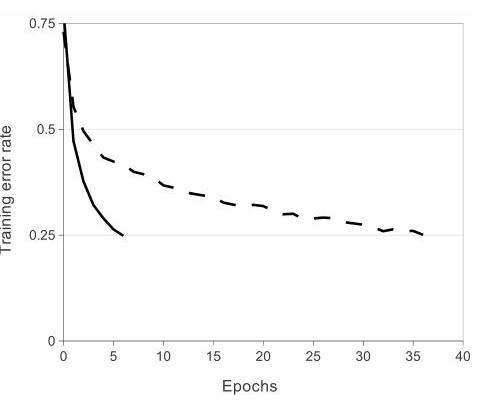

Figure 1: A four-layer convolutional neural network with ReLUs (solid line) reaches a 25\% training error rate on CIFAR-10 six times faster than an equivalent network with tanh neurons (dashed line). The learning rates for each network were chosen independently to make training as fast as possible. No regularization of any kind was employed. The magnitude of the effect demonstrated here varies with network architecture, but networks with ReLUs consistently learn several times faster than equivalents with saturating neurons.

### 3.2 Training on Multiple GPUs

A single GTX 580 GPU has only 3GB of memory, which limits the maximum size of the networks that can be trained on it. It turns out that 1.2 million training examples are enough to train networks which are too big to fit on one GPU. Therefore we spread the net across two GPUs. Current GPUs are particularly well-suited to cross-GPU parallelization, as they are able to read from and write to one another's memory directly, without going through host machine memory. The parallelization scheme that we employ essentially puts half of the kernels (or neurons) on each GPU, with one additional trick: the GPUs communicate only in certain layers. This means that, for example, the kernels of layer 3 take input from all kernel maps in layer 2. However, kernels in layer 4 take input only from those kernel maps in layer 3 which reside on the same GPU. Choosing the pattern of connectivity is a problem for cross-validation, but this allows us to precisely tune the amount of communication until it is an acceptable fraction of the amount of computation.

The resultant architecture is somewhat similar to that of the "columnar" CNN employed by Cireşan et al. [5], except that our columns are not independent (see Figure 2). This scheme reduces our top-1 and top- 5 error rates by $1.7 \%$ and $1.2 \%$, respectively, as compared with a net with half as many kernels in each convolutional layer trained on one GPU. The two-GPU net takes slightly less time to train than the one-GPU net ${ }^{2}$.

[^0]
[^0]:    ${ }^{2}$ The one-GPU net actually has the same number of kernels as the two-GPU net in the final convolutional layer. This is because most of the net's parameters are in the first fully-connected layer, which takes the last convolutional layer as input. So to make the two nets have approximately the same number of parameters, we did not halve the size of the final convolutional layer (nor the fully-conneced layers which follow). Therefore this comparison is biased in favor of the one-GPU net, since it is bigger than "half the size" of the two-GPU net.

# 3.3 Local Response Normalization 

ReLUs have the desirable property that they do not require input normalization to prevent them from saturating. If at least some training examples produce a positive input to a ReLU, learning will happen in that neuron. However, we still find that the following local normalization scheme aids generalization. Denoting by $a_{x, y}^{i}$ the activity of a neuron computed by applying kernel $i$ at position $(x, y)$ and then applying the ReLU nonlinearity, the response-normalized activity $b_{x, y}^{i}$ is given by the expression

$$
b_{x, y}^{i}=a_{x, y}^{i} /\left(k+\alpha \sum_{j=\max (0, i-n / 2)}^{\min (N-1, i+n / 2)}\left(a_{x, y}^{j}\right)^{2}\right)^{\beta}
$$

where the sum runs over $n$ "adjacent" kernel maps at the same spatial position, and $N$ is the total number of kernels in the layer. The ordering of the kernel maps is of course arbitrary and determined before training begins. This sort of response normalization implements a form of lateral inhibition inspired by the type found in real neurons, creating competition for big activities amongst neuron outputs computed using different kernels. The constants $k, n, \alpha$, and $\beta$ are hyper-parameters whose values are determined using a validation set; we used $k=2, n=5, \alpha=10^{-4}$, and $\beta=0.75$. We applied this normalization after applying the ReLU nonlinearity in certain layers (see Section 3.5).
This scheme bears some resemblance to the local contrast normalization scheme of Jarrett et al. [11], but ours would be more correctly termed "brightness normalization", since we do not subtract the mean activity. Response normalization reduces our top-1 and top-5 error rates by $1.4 \%$ and $1.2 \%$, respectively. We also verified the effectiveness of this scheme on the CIFAR-10 dataset: a four-layer CNN achieved a $13 \%$ test error rate without normalization and $11 \%$ with normalization ${ }^{1}$.

### 3.4 Overlapping Pooling

Pooling layers in CNNs summarize the outputs of neighboring groups of neurons in the same kernel map. Traditionally, the neighborhoods summarized by adjacent pooling units do not overlap (e.g., $[17,11,4])$. To be more precise, a pooling layer can be thought of as consisting of a grid of pooling units spaced $s$ pixels apart, each summarizing a neighborhood of size $z \times z$ centered at the location of the pooling unit. If we set $s=z$, we obtain traditional local pooling as commonly employed in CNNs. If we set $s<z$, we obtain overlapping pooling. This is what we use throughout our network, with $s=2$ and $z=3$. This scheme reduces the top-1 and top-5 error rates by $0.4 \%$ and $0.3 \%$, respectively, as compared with the non-overlapping scheme $s=2, z=2$, which produces output of equivalent dimensions. We generally observe during training that models with overlapping pooling find it slightly more difficult to overfit.

### 3.5 Overall Architecture

Now we are ready to describe the overall architecture of our CNN. As depicted in Figure 2, the net contains eight layers with weights; the first five are convolutional and the remaining three are fullyconnected. The output of the last fully-connected layer is fed to a 1000-way softmax which produces a distribution over the 1000 class labels. Our network maximizes the multinomial logistic regression objective, which is equivalent to maximizing the average across training cases of the log-probability of the correct label under the prediction distribution.

The kernels of the second, fourth, and fifth convolutional layers are connected only to those kernel maps in the previous layer which reside on the same GPU (see Figure 2). The kernels of the third convolutional layer are connected to all kernel maps in the second layer. The neurons in the fullyconnected layers are connected to all neurons in the previous layer. Response-normalization layers follow the first and second convolutional layers. Max-pooling layers, of the kind described in Section 3.4, follow both response-normalization layers as well as the fifth convolutional layer. The ReLU non-linearity is applied to the output of every convolutional and fully-connected layer.
The first convolutional layer filters the $224 \times 224 \times 3$ input image with 96 kernels of size $11 \times 11 \times 3$ with a stride of 4 pixels (this is the distance between the receptive field centers of neighboring

[^0]
[^0]:    ${ }^{1}$ We cannot describe this network in detail due to space constraints, but it is specified precisely by the code and parameter files provided here: http://code.google.com/p/cuda-convnet/.

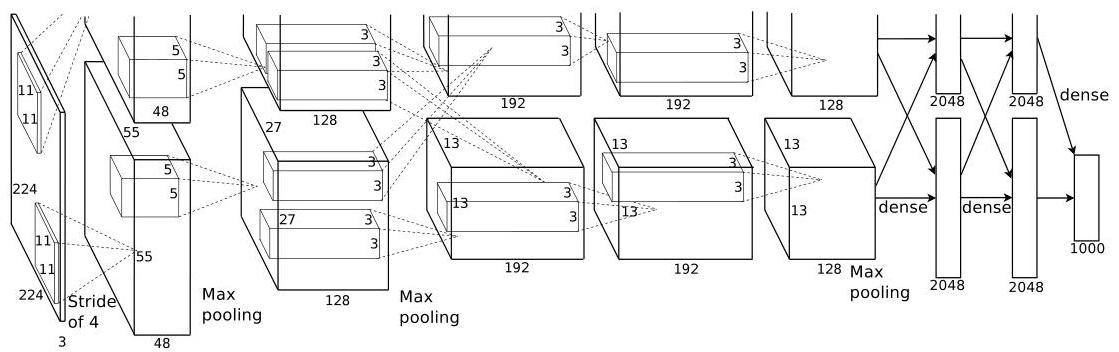

Figure 2: An illustration of the architecture of our CNN, explicitly showing the delineation of responsibilities between the two GPUs. One GPU runs the layer-parts at the top of the figure while the other runs the layer-parts at the bottom. The GPUs communicate only at certain layers. The network's input is 150,528-dimensional, and the number of neurons in the network's remaining layers is given by 253,440-186,624-64,896-64,896-43,264-4096-4096-1000.

neurons in a kernel map). The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48. The third, fourth, and fifth convolutional layers are connected to one another without any intervening pooling or normalization layers. The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer. The fourth convolutional layer has 384 kernels of size 3 × 3 × 192, and the fifth convolutional layer has 256 kernels of size 3 × 3 × 192. The fully-connected layers have 4096 neurons each.

## 4 Reducing Overfitting

Our neural network architecture has 60 million parameters. Although the 1000 classes of ILSVRC make each training example impose 10 bits of constraint on the mapping from image to label, this turns out to be insufficient to learn so many parameters without considerable overfitting. Below, we describe the two primary ways in which we combat overfitting.

### 4.1 Data Augmentation

The easiest and most common method to reduce overfitting on image data is to artificially enlarge the dataset using label-preserving transformations (e.g., [25, 4, 5]). We employ two distinct forms of data augmentation, both of which allow transformed images to be produced from the original images with very little computation, so the transformed images do not need to be stored on disk. In our implementation, the transformed images are generated in Python code on the CPU while the GPU is training on the previous batch of images. So these data augmentation schemes are, in effect, computationally free.

The first form of data augmentation consists of generating image translations and horizontal reflections. We do this by extracting random 224 × 224 patches (and their horizontal reflections) from the 256 × 256 images and training our network on these extracted patches<sup>4</sup>. This increases the size of our training set by a factor of 2048, though the resulting training examples are, of course, highly interdependent. Without this scheme, our network suffers from substantial overfitting, which would have forced us to use much smaller networks. At test time, the network makes a prediction by extracting five 224 × 224 patches (the four corner patches and the center patch) as well as their horizontal reflections (hence ten patches in all), and averaging the predictions made by the network's softmax layer on the ten patches.

The second form of data augmentation consists of altering the intensities of the RGB channels in training images. Specifically, we perform PCA on the set of RGB pixel values throughout the ImageNet training set. To each training image, we add multiples of the found principal components,

<sup>4</sup>This is the reason why the input images in Figure 2 are 224 × 224 × 3-dimensional.

with magnitudes proportional to the corresponding eigenvalues times a random variable drawn from a Gaussian with mean zero and standard deviation 0.1. Therefore to each RGB image pixel $I_{xy}=$ $\left[I_{x y}^{R}, I_{x y}^{G}, I_{x y}^{B}\right]^{T}$ we add the following quantity:

$$
\left[\mathbf{p}_{1}, \mathbf{p}_{2}, \mathbf{p}_{3}\right]\left[\alpha_{1} \lambda_{1}, \alpha_{2} \lambda_{2}, \alpha_{3} \lambda_{3}\right]^{T}
$$

where $\mathbf{p}_{i}$ and $\lambda_{i}$ are $i$ th eigenvector and eigenvalue of the $3 \times 3$ covariance matrix of RGB pixel values, respectively, and $\alpha_{i}$ is the aforementioned random variable. Each $\alpha_{i}$ is drawn only once for all the pixels of a particular training image until that image is used for training again, at which point it is re-drawn. This scheme approximately captures an important property of natural images, namely, that object identity is invariant to changes in the intensity and color of the illumination. This scheme reduces the top-1 error rate by over $1 \%$.

# 4.2 Dropout 

Combining the predictions of many different models is a very successful way to reduce test errors [1, 3], but it appears to be too expensive for big neural networks that already take several days to train. There is, however, a very efficient version of model combination that only costs about a factor of two during training. The recently-introduced technique, called "dropout" [10], consists of setting to zero the output of each hidden neuron with probability 0.5 . The neurons which are "dropped out" in this way do not contribute to the forward pass and do not participate in backpropagation. So every time an input is presented, the neural network samples a different architecture, but all these architectures share weights. This technique reduces complex co-adaptations of neurons, since a neuron cannot rely on the presence of particular other neurons. It is, therefore, forced to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. At test time, we use all the neurons but multiply their outputs by 0.5 , which is a reasonable approximation to taking the geometric mean of the predictive distributions produced by the exponentially-many dropout networks.

We use dropout in the first two fully-connected layers of Figure 2. Without dropout, our network exhibits substantial overfitting. Dropout roughly doubles the number of iterations required to converge.

## 5 Details of learning

We trained our models using stochastic gradient descent with a batch size of 128 examples, momentum of 0.9 , and weight decay of 0.0005 . We found that this small amount of weight decay was important for the model to learn. In other words, weight decay here is not merely a regularizer: it reduces the model's training error. The update rule for weight $w$ was

$$
\begin{aligned}
& v_{i+1}:=0.9 \cdot v_{i}-0.0005 \cdot \epsilon \cdot w_{i}-\epsilon \cdot\left\langle\left.\frac{\partial L}{\partial w}\right|_{w_{i}}\right\rangle_{D_{i}} \\
& w_{i+1}:=w_{i}+v_{i+1}
\end{aligned}
$$

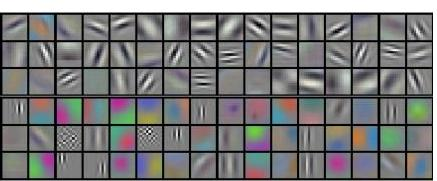

Figure 3: 96 convolutional kernels of size $11 \times 11 \times 3$ learned by the first convolutional layer on the $224 \times 224 \times 3$ input images. The top 48 kernels were learned on GPU 1 while the bottom 48 kernels were learned on GPU 2. See Section 6.1 for details.
where $i$ is the iteration index, $v$ is the momentum variable, $\epsilon$ is the learning rate, and $\left\langle\left.\frac{\partial L}{\partial w}\right|_{w_{i}}\right\rangle_{D_{i}}$ is the average over the $i$ th batch $D_{i}$ of the derivative of the objective with respect to $w$, evaluated at $w_{i}$.
We initialized the weights in each layer from a zero-mean Gaussian distribution with standard deviation 0.01 . We initialized the neuron biases in the second, fourth, and fifth convolutional layers, as well as in the fully-connected hidden layers, with the constant 1 . This initialization accelerates the early stages of learning by providing the ReLUs with positive inputs. We initialized the neuron biases in the remaining layers with the constant 0 .
We used an equal learning rate for all layers, which we adjusted manually throughout training. The heuristic which we followed was to divide the learning rate by 10 when the validation error rate stopped improving with the current learning rate. The learning rate was initialized at 0.01 and

reduced three times prior to termination. We trained the network for roughly 90 cycles through the training set of 1.2 million images, which took five to six days on two NVIDIA GTX 580 3GB GPUs.

# 6 Results 

Our results on ILSVRC-2010 are summarized in Table 1. Our network achieves top-1 and top-5 test set error rates of $\mathbf{3 7 . 5 \%}$ and $\mathbf{1 7 . 0 \%}{ }^{5}$. The best performance achieved during the ILSVRC2010 competition was $47.1 \%$ and $28.2 \%$ with an approach that averages the predictions produced from six sparse-coding models trained on different features [2], and since then the best published results are $45.7 \%$ and $25.7 \%$ with an approach that averages the predictions of two classifiers trained on Fisher Vectors (FVs) computed from two types of densely-sampled features [24].

We also entered our model in the ILSVRC-2012 competition and report our results in Table 2. Since the ILSVRC-2012 test set labels are not publicly available, we cannot report test error rates for all the models that we tried. In the remainder of this paragraph, we use validation and test error rates interchangeably because in our experience they do not differ by more than $0.1 \%$ (see Table 2). The CNN described in this paper achieves a top-5 error rate of $18.2 \%$. Averaging the predictions of five similar CNNs gives an error rate of $16.4 \%$. Training one CNN, with an extra sixth convolutional layer over the last pooling layer, to classify the entire ImageNet Fall 2011 release ( 15 M images, 22 K categories), and then "fine-tuning" it on ILSVRC-2012 gives an error rate of $16.6 \%$. Averaging the predictions of two CNNs that were pre-trained on the entire Fall 2011 release with the aforementioned five CNNs gives an error rate of $\mathbf{1 5 . 3 \%}$. The second-best contest entry achieved an error rate of $26.2 \%$ with an approach that averages the predictions of several classifiers trained on FVs computed from different types of densely-sampled features [7].

Finally, we also report our error rates on the Fall 2009 version of ImageNet with 10,184 categories and 8.9 million images. On this dataset we follow the convention in the literature of using half of the images for training and half for testing. Since there is no established test set, our split necessarily differs from the splits used by previous authors, but this does not affect the results appreciably. Our top-1 and top-5 error rates on this dataset are $\mathbf{6 7 . 4 \%}$ and $\mathbf{4 0 . 9 \%}$, attained by the net described above but with an additional, sixth convolutional layer over the last pooling layer. The best published results on this dataset are $78.1 \%$ and $60.9 \%$ [19].

### 6.1 Qualitative Evaluations

Figure 3 shows the convolutional kernels learned by the network's two data-connected layers. The network has learned a variety of frequency- and orientation-selective kernels, as well as various colored blobs. Notice the specialization exhibited by the two GPUs, a result of the restricted connectivity described in Section 3.5. The kernels on GPU 1 are largely color-agnostic, while the kernels on on GPU 2 are largely color-specific. This kind of specialization occurs during every run and is independent of any particular random weight initialization (modulo a renumbering of the GPUs).

[^0]
[^0]:    ${ }^{5}$ The error rates without averaging predictions over ten patches as described in Section 4.1 are $39.0 \%$ and $18.3 \%$.

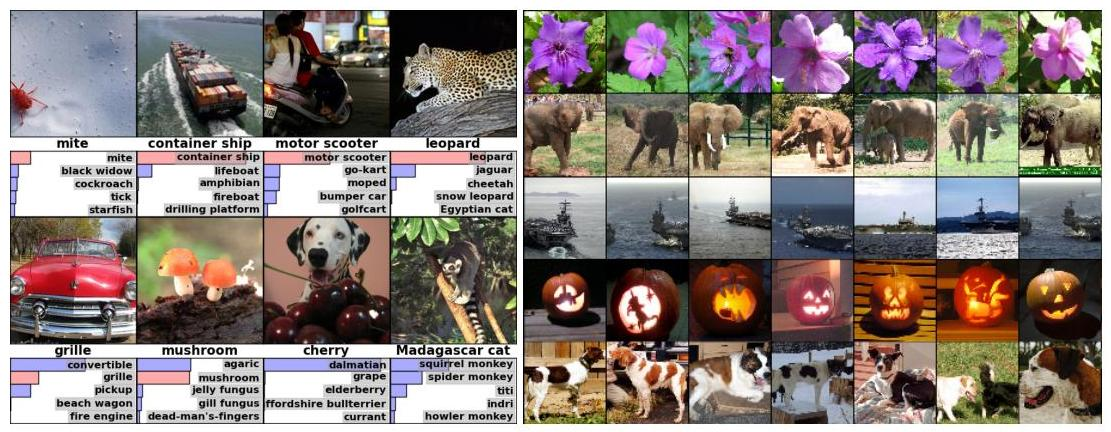

Figure 4: (Left) Eight ILSVRC-2010 test images and the five labels considered most probable by our model. The correct label is written under each image, and the probability assigned to the correct label is also shown with a red bar (if it happens to be in the top 5). (Right) Five ILSVRC-2010 test images in the first column. The remaining columns show the six training images that produce feature vectors in the last hidden layer with the smallest Euclidean distance from the feature vector for the test image.

In the left panel of Figure 4 we qualitatively assess what the network has learned by computing its top-5 predictions on eight test images. Notice that even off-center objects, such as the mite in the top-left, can be recognized by the net. Most of the top-5 labels appear reasonable. For example, only other types of cat are considered plausible labels for the leopard. In some cases (grille, cherry) there is genuine ambiguity about the intended focus of the photograph.

Another way to probe the network's visual knowledge is to consider the feature activations induced by an image at the last, 4096-dimensional hidden layer. If two images produce feature activation vectors with a small Euclidean separation, we can say that the higher levels of the neural network consider them to be similar. Figure 4 shows five images from the test set and the six images from the training set that are most similar to each of them according to this measure. Notice that at the pixel level, the retrieved training images are generally not close in L2 to the query images in the first column. For example, the retrieved dogs and elephants appear in a variety of poses. We present the results for many more test images in the supplementary material.

Computing similarity by using Euclidean distance between two 4096-dimensional, real-valued vectors is inefficient, but it could be made efficient by training an auto-encoder to compress these vectors to short binary codes. This should produce a much better image retrieval method than applying auto-encoders to the raw pixels [14], which does not make use of image labels and hence has a tendency to retrieve images with similar patterns of edges, whether or not they are semantically similar.

# 7 Discussion 

Our results show that a large, deep convolutional neural network is capable of achieving recordbreaking results on a highly challenging dataset using purely supervised learning. It is notable that our network's performance degrades if a single convolutional layer is removed. For example, removing any of the middle layers results in a loss of about $2 \%$ for the top-1 performance of the network. So the depth really is important for achieving our results.

To simplify our experiments, we did not use any unsupervised pre-training even though we expect that it will help, especially if we obtain enough computational power to significantly increase the size of the network without obtaining a corresponding increase in the amount of labeled data. Thus far, our results have improved as we have made our network larger and trained it longer but we still have many orders of magnitude to go in order to match the infero-temporal pathway of the human visual system. Ultimately we would like to use very large and deep convolutional nets on video sequences where the temporal structure provides very helpful information that is missing or far less obvious in static images.

# References 

[1] R.M. Bell and Y. Koren. Lessons from the netflix prize challenge. ACM SIGKDD Explorations Newsletter, $9(2): 75-79,2007$.
[2] A. Berg, J. Deng, and L. Fei-Fei. Large scale visual recognition challenge 2010. www.imagenet.org/challenges. 2010.
[3] L. Breiman. Random forests. Machine learning, 45(1):5-32, 2001.
[4] D. Cireşan, U. Meier, and J. Schmidhuber. Multi-column deep neural networks for image classification. Arxiv preprint arXiv:1202.2745, 2012.
[5] D.C. Cireşan, U. Meier, J. Masci, L.M. Gambardella, and J. Schmidhuber. High-performance neural networks for visual object classification. Arxiv preprint arXiv:1102.0183, 2011.
[6] J. Deng, W. Dong, R. Socher, L.-J. Li, K. Li, and L. Fei-Fei. ImageNet: A Large-Scale Hierarchical Image Database. In CVPR09, 2009.
[7] J. Deng, A. Berg, S. Satheesh, H. Su, A. Khosla, and L. Fei-Fei. ILSVRC-2012, 2012. URL http://www.image-net.org/challenges/LSVRC/2012/.
[8] L. Fei-Fei, R. Fergus, and P. Perona. Learning generative visual models from few training examples: An incremental bayesian approach tested on 101 object categories. Computer Vision and Image Understanding, 106(1):59-70, 2007.
[9] G. Griffin, A. Holub, and P. Perona. Caltech-256 object category dataset. Technical Report 7694, California Institute of Technology, 2007. URL http://authors.library.caltech.edu/7694.
[10] G.E. Hinton, N. Srivastava, A. Krizhevsky, I. Sutskever, and R.R. Salakhutdinov. Improving neural networks by preventing co-adaptation of feature detectors. arXiv preprint arXiv:1207.0580, 2012.
[11] K. Jarrett, K. Kavukcuoglu, M. A. Ranzato, and Y. LeCun. What is the best multi-stage architecture for object recognition? In International Conference on Computer Vision, pages 2146-2153. IEEE, 2009.
[12] A. Krizhevsky. Learning multiple layers of features from tiny images. Master's thesis, Department of Computer Science, University of Toronto, 2009.
[13] A. Krizhevsky. Convolutional deep belief networks on cifar-10. Unpublished manuscript, 2010.
[14] A. Krizhevsky and G.E. Hinton. Using very deep autoencoders for content-based image retrieval. In ESANN, 2011.
[15] Y. Le Cun, B. Boser, J.S. Denker, D. Henderson, R.E. Howard, W. Hubbard, L.D. Jackel, et al. Handwritten digit recognition with a back-propagation network. In Advances in neural information processing systems, 1990.
[16] Y. LeCun, F.J. Huang, and L. Bottou. Learning methods for generic object recognition with invariance to pose and lighting. In Computer Vision and Pattern Recognition, 2004. CVPR 2004. Proceedings of the 2004 IEEE Computer Society Conference on, volume 2, pages II-97. IEEE, 2004.
[17] Y. LeCun, K. Kavukcuoglu, and C. Farabet. Convolutional networks and applications in vision. In Circuits and Systems (ISCAS), Proceedings of 2010 IEEE International Symposium on, pages 253-256. IEEE, 2010.
[18] H. Lee, R. Grosse, R. Ranganath, and A.Y. Ng. Convolutional deep belief networks for scalable unsupervised learning of hierarchical representations. In Proceedings of the 26th Annual International Conference on Machine Learning, pages 609-616. ACM, 2009.
[19] T. Mensink, J. Verbeek, F. Perronnin, and G. Csurka. Metric Learning for Large Scale Image Classification: Generalizing to New Classes at Near-Zero Cost. In ECCV - European Conference on Computer Vision, Florence, Italy, October 2012.
[20] V. Nair and G. E. Hinton. Rectified linear units improve restricted boltzmann machines. In Proc. 27th International Conference on Machine Learning, 2010.
[21] N. Pinto, D.D. Cox, and J.J. DiCarlo. Why is real-world visual object recognition hard? PLoS computational biology, 4(1):e27, 2008.
[22] N. Pinto, D. Doukhan, J.J. DiCarlo, and D.D. Cox. A high-throughput screening approach to discovering good forms of biologically inspired visual representation. PLoS computational biology, 5(11):e1000579, 2009.
[23] B.C. Russell, A. Torralba, K.P. Murphy, and W.T. Freeman. Labelme: a database and web-based tool for image annotation. International journal of computer vision, 77(1):157-173, 2008.
[24] J. Sánchez and F. Perronnin. High-dimensional signature compression for large-scale image classification. In Computer Vision and Pattern Recognition (CVPR), 2011 IEEE Conference on, pages 1665-1672. IEEE, 2011.
[25] P.Y. Simard, D. Steinkraus, and J.C. Platt. Best practices for convolutional neural networks applied to visual document analysis. In Proceedings of the Seventh International Conference on Document Analysis and Recognition, volume 2, pages 958-962, 2003.
[26] S.C. Turaga, J.F. Murray, V. Jain, F. Roth, M. Helmstaedter, K. Briggman, W. Denk, and H.S. Seung. Convolutional networks can learn to generate affinity graphs for image segmentation. Neural Computation, 22(2):511-538, 2010.

In [25]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

# Replace image references in markdown with their base64-encoded image data
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

# Combine all OCR markdown pages into a single markdown string with embedded images
def get_combined_markdown(ocr_response: OCRResponse) -> str:
    markdowns: list[str] = []
    for page in pdf_response.pages:
        image_data = {img.id: img.image_base64 for img in page.images}  # Map image IDs to their base64 data
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display the final markdown with inline images in the notebook
display(Markdown(get_combined_markdown(pdf_response)))


# **Image to text**

Set the Path for the Image

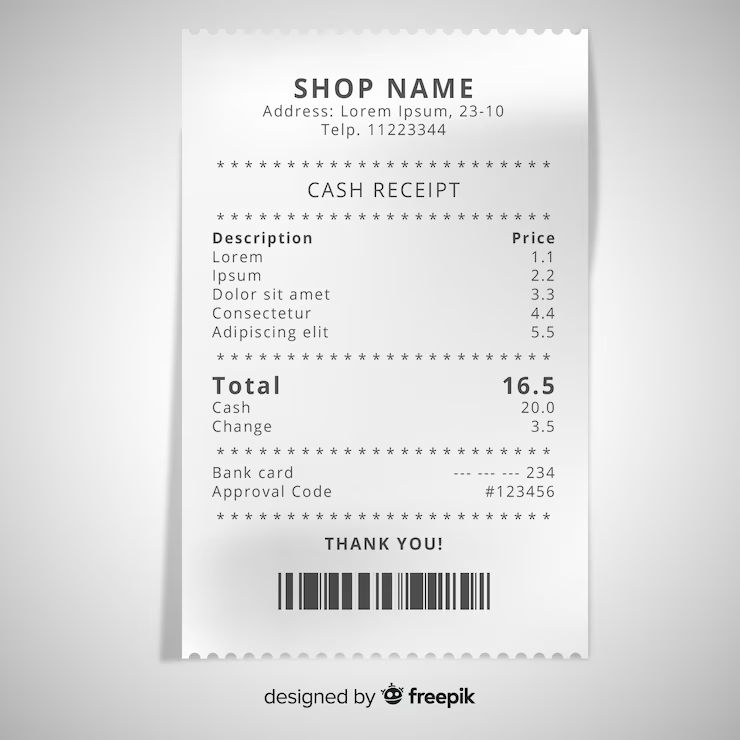

In [21]:
from PIL import Image

image_path = "/content/realistic-receipt-template_23-2147938550.png"

image = Image.open(image_path)
image

Performing OCR on an Image Using Mistral AI with Base64 Encoding and JSON Output

In [26]:
import base64
from pathlib import Path
import json

# Load and verify the image file
image_file = Path("/content/realistic-receipt-template_23-2147938550.png")
assert image_file.is_file()  # Ensure the image file exists

# Encode the image to base64 format
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Perform OCR on the base64-encoded image using Mistral's latest OCR model
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert OCR response to formatted JSON
response_dict = json.loads(image_response.json())
json_string = json.dumps(response_dict, indent=4)

# Print the final JSON output
print(json_string)


{
    "pages": [
        {
            "index": 0,
            "markdown": "# SHOP NAME\nAddress: Lorem Ipsum, 23-10\nTelp. 11223344\n\n**CASH RECEIPT**\n****\nDescription Price\nLorem 1.1\nIpsum 2.2\nDolor sit amet 3.3\nConsectetur 4.4\nAdipiscing elit 5.5\n\n**Total 16.5\nCash 20.0\nChange 3.5\n\nBank card --- 234\nApproval Code #123456\n\n**THANK YOU!**\n\ndesigned by freepik",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 740,
                "width": 740
            }
        }
    ],
    "model": "mistral-ocr-2505-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 131785
    },
    "document_annotation": null
}


<ipython-input-26-3596400095>:20: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  response_dict = json.loads(image_response.json())


Converting OCR Markdown to Structured JSON Using Mistral AI Chat Completion

In [28]:
# Extract OCR markdown from the first page of the OCR response
image_ocr_markdown = image_response.pages[0].markdown

# Use Mistral chat model to convert OCR markdown into a structured JSON format
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": f"""This is image's OCR in markdown:
<BEGIN_IMAGE_OCR>
{image_ocr_markdown}
<END_IMAGE_OCR>.
Convert this into a sensible structured JSON response. The output should be strictly JSON with no extra commentary."""
        },
    ],
    response_format={"type": "json_object"},  # Ensure the response is a JSON object
    temperature=0
)

# Parse the JSON response from the chat completion
response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)

# Print the structured JSON output
print(json_string)


{
    "shopName": "SHOP NAME",
    "address": "Lorem Ipsum, 23-10",
    "phoneNumber": "11223344",
    "cashReceipt": {
        "items": [
            {
                "description": "Lorem",
                "price": 1.1
            },
            {
                "description": "Ipsum",
                "price": 2.2
            },
            {
                "description": "Dolor sit amet",
                "price": 3.3
            },
            {
                "description": "Consectetur",
                "price": 4.4
            },
            {
                "description": "Adipiscing elit",
                "price": 5.5
            }
        ],
        "total": 16.5,
        "cash": 20.0,
        "change": 3.5,
        "bankCard": "234",
        "approvalCode": "#123456"
    },
    "thankYou": "THANK YOU!"
}
